## PROJECT 2

## 1. Scrape and gather our data

In [928]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from __future__ import print_function, division
import requests
import re
#from itertools import chain
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
#import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
%matplotlib inline  

In [64]:
url = 'https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20171025&end=20180125'
# tables = pd.read_html(url)

# tables

# type(tables)

# lol of course there's an easy way 

In [138]:
############### USER INPUT WOW SUPER ADVANCED ###############

url_1 = 'https://coinmarketcap.com/currencies'
coin = input("Enter a cryptocurrency (use dashes instead of spaces, ex: bitcoin-cash):")
url_2 = 'historical-data/?start=20171025&end=20180125'
url = "{}/{}/{}".format(url_1, coin, url_2)
request = requests.get(url)
if request.status_code == 200:
    pass
else:
    print("sp3ll your coin korrectly")

#print(url)

Enter a cryptocurrency (use dashes instead of spaces, ex: bitcoin-cash):dogecoin


In [62]:
## Cook da soup
response = requests.get(url)

page = response.text

soup = BeautifulSoup(page, "lxml")

print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Cryptocurrency Market Capitalizations | CoinMarketCap
  </title>
  <meta content="EDc1reqlQ-zAgeRrrgAxRXNK-Zs9JgpE9a0wdaoSO9A" name="google-site-verification"/>
  <meta content="website" property="og:type"/>
  <meta content="image/png" property="og:image:type"/>
  <meta content="200" property="og:image:width"/>
  <meta content="200" property="og:image:height"/>
  <meta content="http://coinmarketcap.com/static/img/CoinMarketCap.png" property="og:image"/>
  <meta content="https://coinmarketcap.com/static/img/CoinMarketC

## Exploring our soup

In [4]:
soup.find(class_='table-responsive').find_all('tr')[1].text[1:] # pulls second row (first row is header)

'Jan 25, 2018\n11421.70\n11785.70\n11057.40\n11259.40\n8,873,170,000\n192,163,000,000\n'

In [5]:
soup.find_all('tr')

[<tr>
 <th class="text-left">Date</th>
 <th class="text-right">Open</th>
 <th class="text-right">High</th>
 <th class="text-right">Low</th>
 <th class="text-right">Close</th>
 <th class="text-right">Volume</th>
 <th class="text-right">Market Cap</th>
 </tr>, <tr class="text-right">
 <td class="text-left">Jan 25, 2018</td>
 <td data-format-fiat="" data-format-value="11421.7">11421.70</td>
 <td data-format-fiat="" data-format-value="11785.7">11785.70</td>
 <td data-format-fiat="" data-format-value="11057.4">11057.40</td>
 <td data-format-fiat="" data-format-value="11259.4">11259.40</td>
 <td data-format-market-cap="" data-format-value="8873170000.0">8,873,170,000</td>
 <td data-format-market-cap="" data-format-value="1.92163e+11">192,163,000,000</td>
 </tr>, <tr class="text-right">
 <td class="text-left">Jan 24, 2018</td>
 <td data-format-fiat="" data-format-value="10903.4">10903.40</td>
 <td data-format-fiat="" data-format-value="11501.4">11501.40</td>
 <td data-format-fiat="" data-form

In [6]:
tables = soup.find_all("table")
tables

[<table class="table">
 <thead>
 <tr>
 <th class="text-left">Date</th>
 <th class="text-right">Open</th>
 <th class="text-right">High</th>
 <th class="text-right">Low</th>
 <th class="text-right">Close</th>
 <th class="text-right">Volume</th>
 <th class="text-right">Market Cap</th>
 </tr>
 </thead>
 <tbody>
 <tr class="text-right">
 <td class="text-left">Jan 25, 2018</td>
 <td data-format-fiat="" data-format-value="11421.7">11421.70</td>
 <td data-format-fiat="" data-format-value="11785.7">11785.70</td>
 <td data-format-fiat="" data-format-value="11057.4">11057.40</td>
 <td data-format-fiat="" data-format-value="11259.4">11259.40</td>
 <td data-format-market-cap="" data-format-value="8873170000.0">8,873,170,000</td>
 <td data-format-market-cap="" data-format-value="1.92163e+11">192,163,000,000</td>
 </tr>
 <tr class="text-right">
 <td class="text-left">Jan 24, 2018</td>
 <td data-format-fiat="" data-format-value="10903.4">10903.40</td>
 <td data-format-fiat="" data-format-value="11501.

In [7]:
rows = [row for row in tables[0].find_all('tr')] # tr tag is for rows
#type(rows)

In [8]:
soup.find(class_='table-responsive').find_all('tr')[1]

<tr class="text-right">
<td class="text-left">Jan 25, 2018</td>
<td data-format-fiat="" data-format-value="11421.7">11421.70</td>
<td data-format-fiat="" data-format-value="11785.7">11785.70</td>
<td data-format-fiat="" data-format-value="11057.4">11057.40</td>
<td data-format-fiat="" data-format-value="11259.4">11259.40</td>
<td data-format-market-cap="" data-format-value="8873170000.0">8,873,170,000</td>
<td data-format-market-cap="" data-format-value="1.92163e+11">192,163,000,000</td>
</tr>

## Grab our values without the header

In [9]:
numbers = []
dates = []

for i, _ in enumerate(rows):
    numbers.append(soup.find(class_='table-responsive').find_all('tr')[i].text[14:])
    dates.append(soup.find(class_='table-responsive').find_all('tr')[i].text[1:13]) # just the date, easier to work with

In [10]:
numbers = numbers[1:] # drop header
dates = dates[1:]
#numbers
#dates

## Clean our data with REGEX

In [11]:
polished = []
for i,_ in enumerate(numbers):
    temp2 = re.sub('<.*?>', '', str(numbers[i])) # take out all the <...> text
    polished.append(re.sub('\\n', ' ', str(temp2)).split()) # take out the \n text and append to a list

In [12]:
for i,p in enumerate(polished): # whatever's inside the enumerate() is what's getting changed
    p.append(dates[i])

## Create our data frame

In [929]:
header = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap', 'Date']
df = pd.DataFrame(polished, columns = header)

In [930]:
df

,Open,High,Low,Close,Volume,Market_Cap,Date
0,11421.70,11785.70,11057.40,11259.40,"8,873,170,000","192,163,000,000","Jan 25, 2018"
1,10903.40,11501.40,10639.80,11359.40,"9,940,990,000","183,419,000,000","Jan 24, 2018"
2,10944.50,11377.60,10129.70,10868.40,"9,660,610,000","184,087,000,000","Jan 23, 2018"
3,11633.10,11966.40,10240.20,10931.40,"10,537,400,000","195,645,000,000","Jan 22, 2018"
4,12889.20,12895.90,11288.20,11600.10,"9,935,180,000","216,740,000,000","Jan 21, 2018"
5,11656.20,13103.00,11656.20,12899.20,"11,801,700,000","195,979,000,000","Jan 20, 2018"
6,11429.80,11992.80,11172.10,11607.40,"10,740,400,000","192,150,000,000","Jan 19, 2018"
7,11198.80,12107.30,10942.50,11474.90,"15,020,400,000","188,242,000,000","Jan 18, 2018"
8,11431.10,11678.00,9402.29,11188.60,"18,830,600,000","192,123,000,000","Jan 17, 2018"
9,13836.10,13843.10,10194.90,11490.50,"18,853,800,000","232,517,000,000","Jan 16, 2018"


## Clean up our commas and convert date into datetime 

In [931]:
df['Market_Cap'] = df['Market_Cap'].str.replace(',', '')
df['Volume'] = df['Volume'].str.replace(',', '')
df['Date'] = pd.to_datetime(df['Date'])

In [764]:
df

,Open,High,Low,Close,Volume,Market_Cap,Date
0,11421.70,11785.70,11057.40,11259.40,8873170000,192163000000,2018-01-25
1,10903.40,11501.40,10639.80,11359.40,9940990000,183419000000,2018-01-24
2,10944.50,11377.60,10129.70,10868.40,9660610000,184087000000,2018-01-23
3,11633.10,11966.40,10240.20,10931.40,10537400000,195645000000,2018-01-22
4,12889.20,12895.90,11288.20,11600.10,9935180000,216740000000,2018-01-21
5,11656.20,13103.00,11656.20,12899.20,11801700000,195979000000,2018-01-20
6,11429.80,11992.80,11172.10,11607.40,10740400000,192150000000,2018-01-19
7,11198.80,12107.30,10942.50,11474.90,15020400000,188242000000,2018-01-18
8,11431.10,11678.00,9402.29,11188.60,18830600000,192123000000,2018-01-17
9,13836.10,13843.10,10194.90,11490.50,18853800000,232517000000,2018-01-16


## Convert everything to floats

In [932]:
df[['Open','High', 'Low', 'Close', 'Volume', 'Market_Cap']] = df[['Open','High', 'Low', 'Close', 'Volume', 'Market_Cap']].apply(pd.to_numeric)

In [766]:
#df.dtypes

## Move date to the first index - it's weird on the right side

In [933]:
cols = df.columns.tolist() # generate list of column headers
cols.insert(0, cols.pop(cols.index('Date'))) # pop out the date and move it to index 0
#cols
df = df.reindex(columns= cols) # reorder observations

In [934]:
df

,Date,Open,High,Low,Close,Volume,Market_Cap
0,2018-01-25,11421.70,11785.70,11057.40,11259.40,8873170000,192163000000
1,2018-01-24,10903.40,11501.40,10639.80,11359.40,9940990000,183419000000
2,2018-01-23,10944.50,11377.60,10129.70,10868.40,9660610000,184087000000
3,2018-01-22,11633.10,11966.40,10240.20,10931.40,10537400000,195645000000
4,2018-01-21,12889.20,12895.90,11288.20,11600.10,9935180000,216740000000
5,2018-01-20,11656.20,13103.00,11656.20,12899.20,11801700000,195979000000
6,2018-01-19,11429.80,11992.80,11172.10,11607.40,10740400000,192150000000
7,2018-01-18,11198.80,12107.30,10942.50,11474.90,15020400000,188242000000
8,2018-01-17,11431.10,11678.00,9402.29,11188.60,18830600000,192123000000
9,2018-01-16,13836.10,13843.10,10194.90,11490.50,18853800000,232517000000


## Create Month variable

In [935]:
df['Month'] = df['Date'].dt.month
df = df.drop(['Date'], axis=1)

In [936]:
df.Month = df['Month'].map({10: 1, 11: 2, 12:3, 1:4})
df

,Open,High,Low,Close,Volume,Market_Cap,Month
0,11421.70,11785.70,11057.40,11259.40,8873170000,192163000000,4
1,10903.40,11501.40,10639.80,11359.40,9940990000,183419000000,4
2,10944.50,11377.60,10129.70,10868.40,9660610000,184087000000,4
3,11633.10,11966.40,10240.20,10931.40,10537400000,195645000000,4
4,12889.20,12895.90,11288.20,11600.10,9935180000,216740000000,4
5,11656.20,13103.00,11656.20,12899.20,11801700000,195979000000,4
6,11429.80,11992.80,11172.10,11607.40,10740400000,192150000000,4
7,11198.80,12107.30,10942.50,11474.90,15020400000,188242000000,4
8,11431.10,11678.00,9402.29,11188.60,18830600000,192123000000,4
9,13836.10,13843.10,10194.90,11490.50,18853800000,232517000000,4


## Start Exploratory Data Analysis

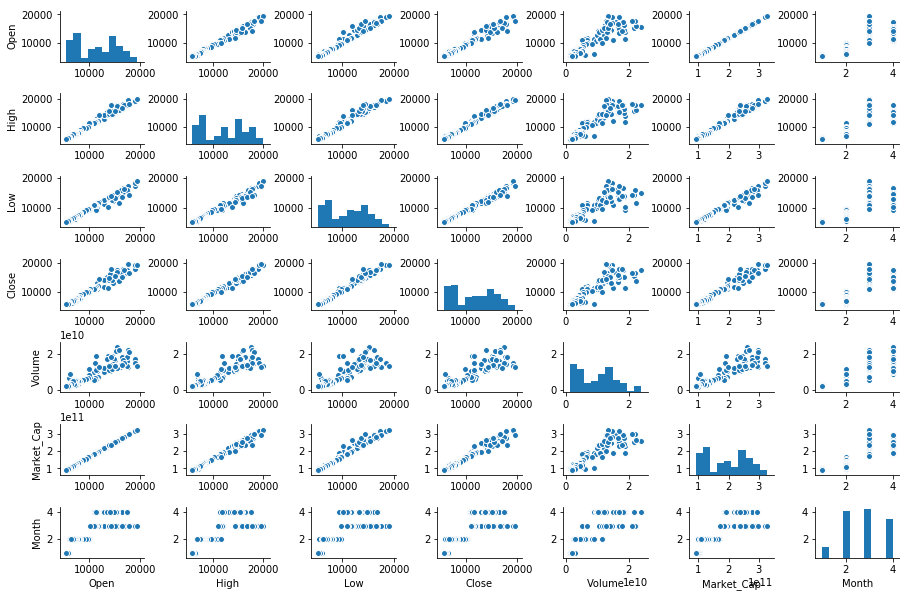

In [938]:
sns.pairplot(df, size = 1.2, aspect=1.5)

Linear relationship between target (Close) and features

In [227]:
df.corr()

,Open,High,Low,Close,Volume,Market_Cap,Month
Open,1.000000,0.988974,0.979586,0.974635,0.866656,0.999983,-0.207035
High,0.988974,1.000000,0.983816,0.993136,0.873780,0.988866,-0.185637
Low,0.979586,0.983816,1.000000,0.988224,0.815811,0.979490,-0.195579
Close,0.974635,0.993136,0.988224,1.000000,0.849180,0.974472,-0.183543
Volume,0.866656,0.873780,0.815811,0.849180,1.000000,0.867831,-0.396776
Market_Cap,0.999983,0.988866,0.979490,0.974472,0.867831,1.000000,-0.212119
Month,-0.207035,-0.185637,-0.195579,-0.183543,-0.396776,-0.212119,1.000000


Okay, so everything is highly correlated. Later, we'll start off by establishing a baseline RMSE with one feature at at time. 

## Residual plot for all features

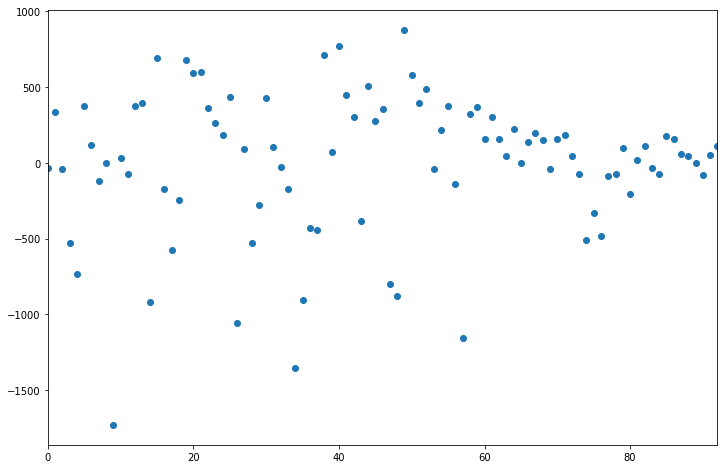

In [962]:
lm_all = smf.ols('Close ~ High ', data=df)
fit_all = lm_all.fit()
fit_all.resid.plot(style='o', figsize=(12,8))
#fit_all.resid.plot(figsize = (12,8))

## Create two data sets for later analysis

In [939]:
df_recent = df.iloc[:51] # larger variance set
df_happier_days = df.iloc[51:] # smaller variance set

df_recent = df_recent.reset_index(drop=True)
df_happier_days = df_happier_days.reset_index(drop=True)

In [798]:
# OLSInfluence.summary_frame() possible tool to find influential points

TypeError: summary_frame() missing 1 required positional argument: 'self'

## Calculate RMSE in one-feature models

In [941]:
def rmses(y, x):
'''Calculate the RMSE with target and feature'''
    lm_high = smf.ols('y~x', data=df)
    # Fit the model
    fit_high = lm_high.fit()
    return (np.square(np.subtract(y, fit_high.predict(x))).mean())**.5

In [942]:
for column in df:
    print(rmses(df.Close, df[column]))
list(df)

893.3407767109468
466.89372940931753
610.793558948832
0.0
2108.0286151309674
896.1725707961965
2799.7373755772937


['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap', 'Month']

Okay, so High has the lowest RMSE value at $466.89 - This will be the baseline

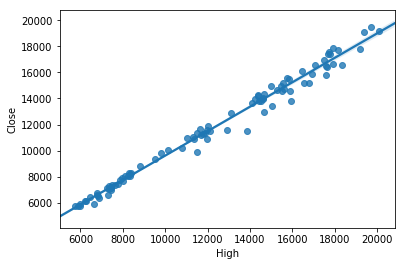

In [200]:
sns.regplot(x='High', y='Close', data=df) # Closing vs. High

## Backwards Selection

In the next cell below, I did a backwards selection on our full model by removing, one by one, the features with the largest p-values. I ended up with High, Low, and Market_Cap as the remaining significant features.

Adjusted R-Squared is 0.995

RMSE is $284.35

In [833]:
lm_test = smf.ols('Close ~ High + Low + Market_Cap', data=df)
fit_test = lm_test.fit()
predictions = fit_test.predict(df_features)
print((np.square(np.subtract(df.Close, predictions)).mean())**.5)
print(fit_test.summary())

284.3461616027628
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5817.
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          5.87e-102
Time:                        00:16:43   Log-Likelihood:                -657.43
No. Observations:                  93   AIC:                             1323.
Df Residuals:                      89   BIC:                             1333.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3802     95.812  

In [856]:
lm_test = smf.ols('Close ~ High + Low + Open', data=df_recent)
fit_test = lm_test.fit()
predictions = fit_test.predict(df_features)
print((np.square(np.subtract(df.Close, predictions)).mean())**.5)
print(fit_test.summary())
# RMSE 419.30, Adj R2 0.986

419.29815224561753
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1475.
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.80e-37
Time:                        00:30:31   Log-Likelihood:                -281.51
No. Observations:                  42   AIC:                             569.0
Df Residuals:                      39   BIC:                             574.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -42.9757    150.424 

In [837]:
lm_test = smf.ols('Close ~ High + Low + Market_Cap + Open + Month', data=df_happier_days)
fit_test = lm_test.fit()
predictions = fit_test.predict(df_features)
print((np.square(np.subtract(df.Close, predictions)).mean())**.5)
print(fit_test.summary())

# RMSE 298, Adj R2 0.981

298.0168862791409
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     511.7
Date:                Fri, 02 Feb 2018   Prob (F-statistic):           1.89e-38
Time:                        00:17:32   Log-Likelihood:                -362.62
No. Observations:                  51   AIC:                             737.2
Df Residuals:                      45   BIC:                             748.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1064.5889    735.574  

## Normal QQ Plot

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

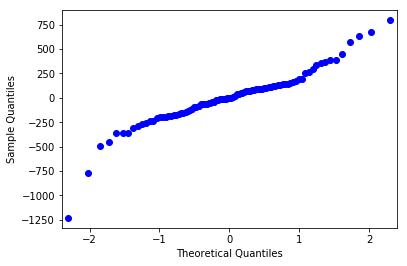

In [513]:
lm_test2 = smf.ols('Close ~ High + Volume + Low + Market_Cap + Month + Open', data=df)
fit_test2 = lm_test2.fit()
#fit_test2.summary()
res = fit_test2.resid # residuals
fig = sm.qqplot(res)
plt.show()

From our QQ plot, we have evidence that our target, Close, isn't normally distributed.

I mean, it looks "okay"

In [ ]:
df['Close_log']=df["Close"].apply(np.log)

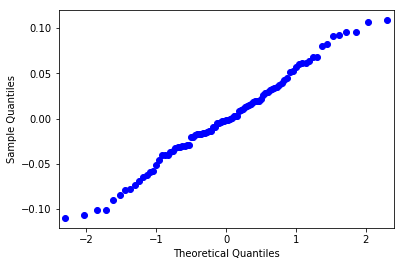

In [518]:
# Transformed target variable 
lm_test2 = smf.ols('Close_log ~ High + Volume + Low + Market_Cap + Month + Open', data=df)
fit_test2 = lm_test2.fit()
#fit_test2.summary()
res = fit_test2.resid # residuals
fig = sm.qqplot(res)
plt.show()

Despite the normal QQ plot looking less sigmoidal, our log transformation on the target will create more problems down the road in analysis. Going back and looking at our pair plots, we can see that our target / features relationships were already fairly linear. In the upcoming calculations done on our CVs, we can see that our RMSE goes up after the log transformation

In [865]:
df = df.drop(['Close_log'], axis=1)

In [402]:
# Tidbit on normalizing data

# from sklearn import preprocessing

#  Normalize data
# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(df)
# df_normalized = pd.DataFrame(np_scaled)
# df_normalized.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap', 'Month'] # columns
# df_normalized

In [421]:
# Playing around with polynomials

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures

# poly = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                   ('linear', LinearRegression(fit_intercept=False))])
# poly.fit(df.High.reshape(-1,1), df.Close.reshape(-1,1))

## Cross Validation

In [943]:
## Split into two data frames, target and feature
df_target = df.drop(['Open', 'High', 'Low', 'Volume', 'Market_Cap', 'Month'], axis=1)
df_features = df.drop(['Close'], axis=1)

In [944]:
## This part is for our split data sets

df_recent_target = df_recent.drop(['Open', 'High', 'Low', 'Volume', 'Market_Cap', 'Month'], axis=1)
df_recent_features = df_recent.drop(['Close'], axis=1)

df_happier_days_target = df_happier_days.drop(['Open', 'High', 'Low', 'Volume', 'Market_Cap', 'Month'], axis=1)
df_happier_days_features = df_happier_days.drop(['Close'], axis=1)

In [367]:
# # intermediate/test split (gives us test set)
# X_intermediate, X_test, y_intermediate, y_test = train_test_split(df.High.reshape(-1,1), 
#                                                                   df_target, 
#                                                                   shuffle=True,
#                                                                   test_size=0.2, 
#                                                                   random_state=15)

# # train/validation split (gives us train and validation sets)
# X_train, X_validation, y_train, y_validation = train_test_split(X_intermediate,
#                                                                 y_intermediate,
#                                                                 shuffle=False,
#                                                                 test_size=0.25,
#                                                                 random_state=2018)

# # delete intermediate variables
# del X_intermediate, y_intermediate

# # print proportions
# print('train: {}% | validation: {}% | test {}%'.format(round(len(y_train)/len(df_target),2),
#                                                        round(len(y_validation)/len(df_target),2),
#                                                        round(len(y_test)/len(df_target),2)))

# alphas = [0, 0.001, 0.01, 0.1, 1, 10]
# print('All errors are RMSE')
# print('-'*76)
# for alpha in alphas:
#     # instantiate and fit model
#     ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
#     ridge.fit(X_train, y_train)
#     # calculate errors
#     new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
#     new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
#     new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
#     # print errors as report
#     print('alpha: {:7} | train error: {:5} | val error: {:6} | test error: {}'.
#           format(alpha,
#                  round(new_train_error,3),
#                  round(new_validation_error,3),
#                  round(new_test_error,3)))

# from sklearn.model_selection import KFold

# K = 5
# kf = KFold(n_splits=K, shuffle=True, random_state=42)
# data = df_features.iloc[0:, :]
# target = df.Close

# for alpha in alphas:
#     train_errors = []
#     validation_errors = []
#     for train_index, val_index in kf.split(data, target):
        
#         # split data
#         X_train, X_val = data.iloc[train_index], data.iloc[val_index]
#         y_train, y_val = target[train_index], target[val_index]

#         # instantiate model
#         lasso = Ridge(alpha=alpha, fit_intercept=True, random_state=77) # Ridge, Lasso, 
        
#         #calculate errors
#         train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, lasso)
        
#         # append to appropriate list
#         train_errors.append(train_error)
#         validation_errors.append(val_error)
    
#     # generate report
#     print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
#           format(alpha,
#                  round(np.mean(train_errors)**.5,4),
#                  round(np.mean(validation_errors)**.5,4)))

# print(df.Close)

# lr = LinearRegression(fit_intercept=True)

# train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
# train_error, test_error = round(train_error, 3), round(test_error, 3)

# print('train error: {} | test error: {}'.format(train_error, test_error))
# print('train/test: {}'.format(round(test_error/train_error, 1)))

/Users/Dereck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [242]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RidgeCV
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.cross_validation import KFold
# from sklearn.preprocessing import StandardScaler

/Users/Dereck/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [817]:
# # PCA
# from sklearn.preprocessing import StandardScaler
# #df_drop_date = df.drop(['Date'], axis=1)
# df_std = StandardScaler().fit_transform(df_drop_date)

# #print(df_std)

# import numpy as np
# from sklearn.decomposition import PCA
# #X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# pca = PCA(n_components=6)
# pca.fit(df_std)


# print(pca.explained_variance_ratio_)  

# #print(pca.singular_values_) 

# print(sum(pca.explained_variance_ratio_))

[  8.95683701e-01   7.86639444e-02   1.74812110e-02   6.23886468e-03
   1.66176598e-03   2.69324661e-04]
0.999998812021


In [945]:
# shamelessly ripped from David's blog
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse

In [946]:
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse

In [947]:
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [948]:
# train/test split, test = validation here
X_train, X_test, y_train, y_test = train_test_split(df_features.iloc[:, 0:3],
                                                    df.Close, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=15)

Find our RMSE training and validation error in our linear regression model with on just our train / validation set

In [949]:
lr = LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
train_error, test_error = round(train_error, 4), round(test_error, 4)

print('(RMSE) train error: {} | (RMSE) validation error: {}'.format(train_error**.5, test_error**.5))

(RMSE) train error: 268.5887287285153 | (RMSE) validation error: 344.8969905638494


## Regularization Exploration

Find our training and validation error in our regularization model and see how that compares to our linear regression model. In the below cell's output, we can see that the best alpha value is 0, indicating that regularization does not help our case (rats!). It's just OLS.

I tested all three types of regularization with different feature combinations. Each time, alpha = 0 gave the lowest RMSE for our training and validation errors

In [950]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=15)

for alpha in alphas:
    data = df_features
    target = df.Close
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
    
        # split data
        X_train, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train, y_val = target[train_index], target[val_index]
 
        # When standardizing our data, we have to do it AFTER we initialize our training and validation data sets
        ss = StandardScaler()
        ss.fit(X_train)
        X_train_std = ss.transform(X_train)
        X_val_std = ss.transform(X_val) 
        
        # instantiate model
        regularization = Ridge(alpha=alpha, fit_intercept=True, random_state=77)
        
        # calculate errors
        train_error, val_error = calc_metrics(X_train_std, y_train, X_val_std, y_val, regularization)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors) ** .5,4),
                 round(np.mean(validation_errors) ** .5,4)))

alpha:  0.001 | mean(train_error): 278.5091 | mean(val_error): 302.853
alpha:   0.01 | mean(train_error): 281.1479 | mean(val_error): 305.2096
alpha:      0 | mean(train_error): 274.8161 | mean(val_error): 300.222
alpha:    0.1 | mean(train_error): 284.1603 | mean(val_error): 309.0483
alpha:      1 | mean(train_error): 358.5096 | mean(val_error): 388.8111
alpha:     10 | mean(train_error): 579.5608 | mean(val_error): 603.7357


## K-fold CV results (OLS)

In [960]:
K = 2
kf = KFold(n_splits=K, shuffle=True, random_state=15)
data = df_features
target = df.Close
train_errors = []
validation_errors = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]

    # instantiate model
    model = LinearRegression(fit_intercept=True)

    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

# generate report
print('K: {} | mean(train_error): {:7} | mean(val_error): {}'.
      format(K,
             round(np.mean(train_errors) ** .5,4),
             round(np.mean(validation_errors) ** .5,4)))
print(model.coef_)
print(model.intercept_)

# Calculate y-hat and RMSE for this model
y_hat = model.predict(df_features)
print((np.square(np.subtract(df.Close, y_hat).mean())**.5))
print(y_hat)

K: 2 | mean(train_error): 270.0195 | mean(val_error): 294.6912
[  4.03975742e+00   8.22693503e-01   5.40545843e-01   4.38600077e-09
  -2.64166575e-07   1.79219301e+02]
-373.430584248
5.74586169163
[ 11433.27051401  11194.39652867  10805.15564935  11081.67318493
  11911.96289454  12792.79151483  11709.99681936  11798.03699472
  10542.21727176  11796.84672913  14163.39669231  13775.1061711
  14447.65871436  13868.31402267  13916.02832577  14361.95838904
  14977.98322411  15198.22284416  16654.21912257  17175.48807509
  17139.17015188  15235.09027065  15373.28518738  14897.8004186
  13584.34964236  13898.11800213  13249.27905324  14794.30688912
  14645.34494097  16031.72859419  15896.67262221  14055.51998594
  13477.68159896  15134.32985768  13629.50532501  16557.4197313
  16857.75025375  17989.98564738  18739.83178186  19528.04239735
  19099.23544568  17779.83843848  16767.35964059  16735.79283362
  17366.7614256   17082.25142057  14648.84974041  15154.93760532
  16359.92992045  17168.97

^^^^^^^^ We take our K-fold Cross-Validated model and generate Closing price predictions, and finally our RMSE

Close-hat = -373.43 + 4.0398_Open + .82269_High + .5405_Low + .000000004386_Volume - .0000002642_Market Cap + 179.2193_Month

In [956]:
11421.70*4.0398 + .82269*11785.7 + 11057.4*.5405 + .000000004386*8873170000 - .0000002642*192163000000 + 179.2193*4

11800.216216620005

In [784]:
# RMSE for our OLS model
lm_test = smf.ols('Close ~ High + Low + Market_Cap', data=df)
fit_test = lm_test.fit()
predictions = fit_test.predict(df_features)
print((np.square(np.subtract(df.Close, predictions)).mean())**.5)
#print(fit_test.summary())

## This is just for our in sample, so won't be able to generalize really well

284.3461616027628


## Playing with our split data sets 

In [899]:
K = 2
kf = KFold(n_splits=K, shuffle=True, random_state=42)

for alpha in alphas:
    data = df_recent_features
    target = df_recent.Close
    train_errors = []
    validation_errors = []
    for train_index, val_index in kf.split(data, target):
    
        # split data
        X_train, X_val = data.iloc[train_index], data.iloc[val_index]
        y_train, y_val = target[train_index], target[val_index]
 
        # When standardizing our data, we have to do it AFTER we initialize our training and validation data sets
        ss = StandardScaler()
        ss.fit(X_train)
        X_train_std = ss.transform(X_train)
        X_val_std = ss.transform(X_val) 
        
        # instantiate model
        regularization = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
        
        
        # calculate errors
        train_error, val_error = calc_metrics(X_train_std, y_train, X_val_std, y_val, regularization)
        
        # append to appropriate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    
    # generate report
    print('alpha: {:6} | mean(train_error): {:7} | mean(val_error): {}'.
          format(alpha,
                 round(np.mean(train_errors) ** .5,4),
                 round(np.mean(validation_errors) ** .5,4)))

alpha:  0.001 | mean(train_error): 296.1008 | mean(val_error): 349.1113
alpha:   0.01 | mean(train_error): 296.1269 | mean(val_error): 349.1376
alpha:      0 | mean(train_error): 296.0979 | mean(val_error): 349.1084
alpha:    0.1 | mean(train_error): 296.3778 | mean(val_error): 349.3262
alpha:      1 | mean(train_error): 299.0862 | mean(val_error): 352.0957
alpha:     10 | mean(train_error): 307.126 | mean(val_error): 356.3576


/Users/Dereck/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/Dereck/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Dereck/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


In [954]:
K = 2
kf = KFold(n_splits=K, shuffle=True, random_state=15)
data = df_happier_days_features
target = df_happier_days.Close
train_errors = []
validation_errors = []

for train_index, val_index in kf.split(data, target):

    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]

    # instantiate model
    model = LinearRegression(fit_intercept=True)

    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

# generate report
print('K: {} | mean(train_error): {:7} | mean(val_error): {}'.
      format(K,
             round(np.mean(train_errors) ** .5,4),
             round(np.mean(validation_errors) ** .5,4)))
print(model.coef_)
print(model.intercept_)

# Calculate y-hat and RMSE for this model
y_hat = model.predict(df_happier_days_features)
print((np.square(np.subtract(df_happier_days.Close, y_hat).mean())**.5))
#print(y_hat)

K: 2 | mean(train_error): 89.0182 | mean(val_error): 264.9728
[ -3.16813359e+01   6.60159984e-01   7.75779194e-01  -1.00824881e-07
   1.86094640e-06   1.83718289e+02]
1615.47414766
37.5301954296


## Twitter API scrape attempt

In [ ]:
from TwitterAPI import TwitterAPI
from TwitterAPI import TwitterRestPager

In [ ]:
api = TwitterAPI("yksQKJNRyIsXma6LuBRrmUuxI", "HLxCzOaxdF86Y29XKjVrQN1YiajdrRmwVMMA31mdPDIf0q5fLi"
, "435243395-SwKdDQI5lDnxOg1mDV6k6i2FNzwlRExk4YFuYZwN", "cQ21KMKW8qykkOUYgj15mXF5gIO3HXbsxztxG0AKknU6d"
)

In [ ]:
count = 0
r = TwitterRestPager(api, 'search/tweets', {'q':'BTC', 'count':100})
for item in r.get_iterator(wait=6):
    if 'text' in item:
        count += 1
    elif 'message' in item and item['code'] == 88:
        print('SUSPEND, RATE LIMIT EXCEEDED: %s' % item['message'])
        break
print(count)